# Tratamento dos dados

### Imports

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from scipy import stats
import random

### Filtragem dos dados


In [75]:
file_path = r'.\Planilha_dados_referencia_tommy.xlsx'

#importando o arquivo e guardando na variável file_path

fs_df = pd.read_excel(file_path)
#o pandas como pd lê o arquivo em file_path e guarda na variavel fs_df

fs_df.tail()

,DATA,Tratamento,ID,SST (°brix),Firmeza (N),AAC,ATT,%UBS,900.577121,904.475237,...,1675.187331,1678.109677,1681.027723,1683.941471,1686.850921,1689.756072,1692.656924,1694.588437,1697.482126,1700.371515
55,2022-12-12,NaN,342,10.7,7.075,3.306430,0.135583,0.136896,0.350532,0.355125,...,0.632711,0.622996,0.611317,0.604078,0.605264,0.612390,0.622052,0.632466,0.643960,0.659553
56,2022-12-12,T12,417,14.3,4.500,10.369884,0.136548,0.164518,0.371361,0.373237,...,0.622437,0.613745,0.605089,0.604141,0.597877,0.617234,0.619050,0.624497,0.633203,0.645629
57,2022-12-12,NaN,422,10.0,5.350,5.599116,0.226303,0.126690,0.351365,0.356774,...,0.618853,0.606919,0.598114,0.595737,0.584410,0.604189,0.619322,0.619742,0.630844,0.644746
58,2022-12-12,NaN,425,12.4,5.300,5.764387,0.235900,0.150987,0.385812,0.387985,...,0.632640,0.625413,0.612981,0.608648,0.607159,0.614649,0.630478,0.637312,0.651933,0.653270
59,2022-12-12,NaN,436,12.1,4.525,6.029384,0.175093,0.144885,0.389259,0.390538,...,0.637232,0.623061,0.612291,0.606221,0.607768,0.617015,0.631760,0.626112,0.642514,0.652046


In [76]:
# Supondo que fs_df já esteja definido
# params contém as colunas específicas que queremos
params = ['SST (°brix)', 'Firmeza (N)', 'AAC', 'ATT', '%UBS']
# Seleciona as colunas especificadas em params e remove linhas com valores NaN
fs_params = fs_df[params].dropna()
# Seleciona as colunas de interesse (da coluna 39 até a coluna 2130)

fs_vars = fs_df.columns[8:]
# Seleciona as colunas especificadas em fs do dataframe fs_df e remove linhas com valores NaN
dados_wl = fs_df[fs_vars].dropna()
# Exibe o dataframe resultante
#print(fs_df_selected)
# Cria um array de comprimentos de onda
wl = fs_vars
# Exibe os comprimentos de onda
print(wl)
#dados_wl
#fs
dados_wl = fs_df[fs_vars]

Index([ 900.577121,  904.475237,  908.369055,  912.258573,  916.143794,
        918.731552,  922.609608,  926.483366,  930.352825,  934.217985,
       ...
       1675.187331, 1678.109677, 1681.027723, 1683.941471, 1686.850921,
       1689.756072, 1692.656924, 1694.588437, 1697.482126, 1700.371515],
      dtype='object', length=248)


# Pré-processamento dos dados


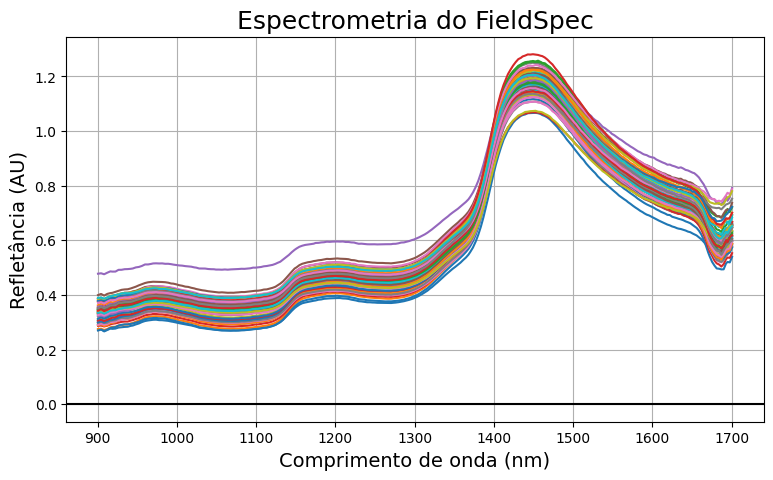

In [77]:
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, dados_wl.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Espectrometria do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
plt.axhline(y=0, color='k', linewidth=1.5)  # linha do eixo x
# Exibe o gráfico
plt.show()


### Savitzky-Golay

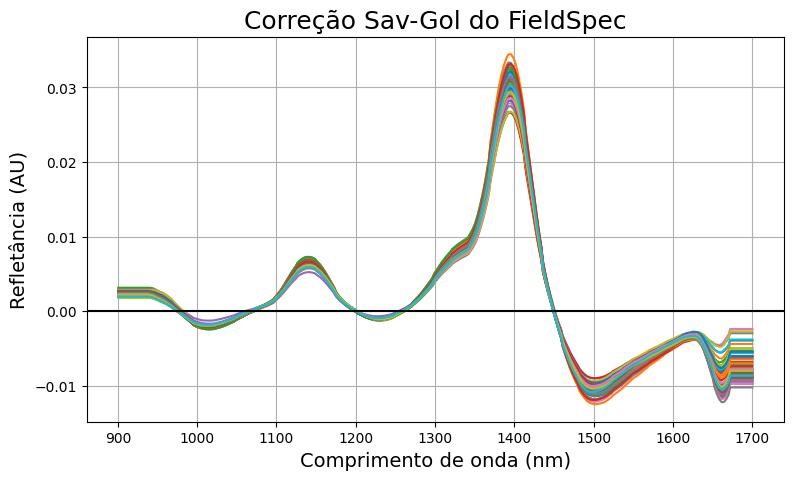

In [78]:
# Aplica a função savgol_filter aos dados x
# para calcular a primeira derivada dos dados
# utilizando uma janela de tamanho 20 e um polinômio de ordem 1
sav_gol = savgol_filter(dados_wl, 21, polyorder=1, deriv=1) 
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x
plt.plot(wl, sav_gol.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Correção Sav-Gol do FieldSpec", size=18)
# Aumenta a espessura das linhas dos eixos x e y no ponto onde cruzam zero
plt.axhline(y=0, color='k', linewidth=1.5)  # linha do eixo x
# Ativa a grade no gráfico
plt.grid(True)
# Exibe o gráfico
plt.show()


In [79]:
# Criando um DataFrame a partir dos dados
df_savgol = pd.DataFrame(sav_gol)
# Nome do arquivo Excel a ser exportado
filename = 'manga_savgol_ordem_1.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df_savgol.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### MSC

In [80]:
def apply_msc(df):
    """
    Aplica a correção multiplicativa de espalhamento (MSC) aos dados espectroscópicos.
    Parâmetros:
    df : pandas.DataFrame
        DataFrame contendo os dados espectroscópicos. As linhas devem ser amostras e as colunas devem ser comprimentos de onda.
    
    Retorna:
    pandas.DataFrame
        DataFrame com os dados corrigidos pelo MSC.
    """
    # Calcula o espectro médio de referência
    mean_spectrum = df.mean(axis=0)
    
    # Lista para armazenar os espectros corrigidos
    corrected_spectra = []
    
    # Aplica MSC a cada espectro individualmente
    for i in range(df.shape[0]):
        spectrum = df.iloc[i, :]
        
        # Ajusta uma linha reta ao espectro médio de referência
        slope, intercept = np.polyfit(mean_spectrum, spectrum, 1)
        
        # Corrige o espectro
        corrected_spectrum = (spectrum - intercept) / slope
        corrected_spectra.append(corrected_spectrum)
    
    # Converte a lista de espectros corrigidos de volta para um DataFrame
    corrected_df = pd.DataFrame(corrected_spectra, columns=df.columns)
    
    return corrected_df

dados_wl
df_msc = apply_msc(dados_wl)
#df_msc

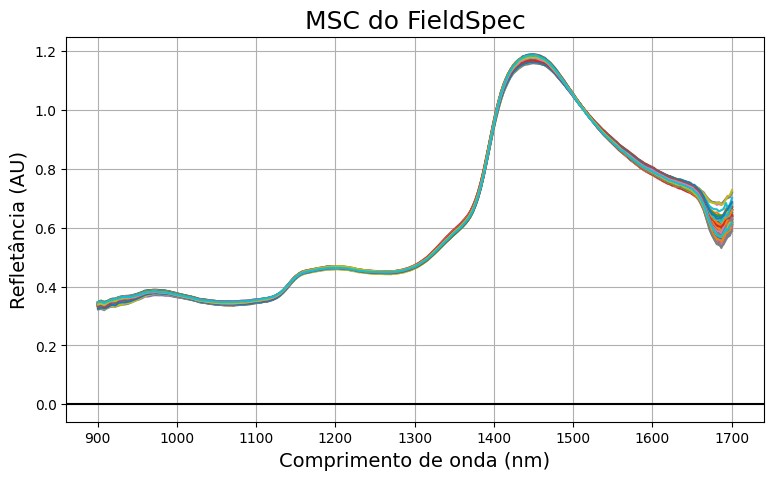

In [81]:
import matplotlib.pyplot as plt
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos
plt.plot(wl, df_msc.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("MSC do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
plt.axhline(y=0, color='k', linewidth=1.5)  # linha do eixo x
# Exibe o gráfico
plt.show()

In [82]:
# Criando um DataFrame a partir dos dados
df = pd.DataFrame(df_msc)
# Nome do arquivo Excel a ser exportado
filename = 'manga_msc.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### SNV

In [83]:
def snv(input_data):
    """
    Aplica a transformação Standard Normal Variate (SNV) aos dados de entrada.
    
    Parameters:
    input_data (numpy.ndarray): Dados de entrada, onde cada linha é um espectro.
    
    Returns:
    numpy.ndarray: Dados transformados após a aplicação do SNV.
    """
    # Calcular a média de cada linha
    mean = np.mean(input_data, axis=1, keepdims=True)
    # Calcular o desvio padrão de cada linha
    std_dev = np.std(input_data, axis=1, keepdims=True)
    # Aplicar a transformação SNV
    snv_data = (input_data - mean) / std_dev
    return snv_data

# Exemplo de DataFrame (substitua pelo seu DataFrame real)
dados_wl

# Certifique-se de que os dados são numéricos
if not np.issubdtype(dados_wl.values.dtype, np.number):
    raise ValueError("Todos os dados de entrada devem ser numéricos.")

# Aplicando a transformação SNV ao DataFrame
df_snv = snv(dados_wl.values)
df_snv = pd.DataFrame(df_snv, columns=wl)

#data_snv_fs


In [84]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "manga_snv.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
df_snv.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em manga_snv.xlsx


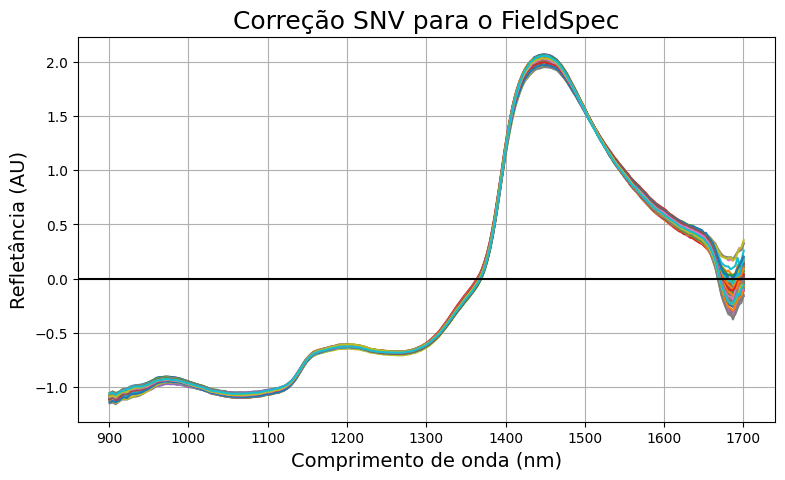

In [85]:
# Cria uma figura para o gráfico com tamanho 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos SNV em relação ao eixo x wl
plt.plot(wl, df_snv.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" e o tamanho da fonte como 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" e o tamanho da fonte como 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Correção SNV para o FieldSpec" e o tamanho da fonte como 18
plt.title("Correção SNV para o FieldSpec", size=18)
# Adiciona uma grade ao gráfico
plt.grid("on")
plt.axhline(y=0, color='k', linewidth=1.5)  # linha do eixo x
# Exibe o gráfico
plt.show()

# Divisão de dados

In [86]:
# Lista de conjuntos de dados espectrais (X) e atributos de qualidade (Y) para cada dispositivo
Y = fs_df[['SST (°brix)', 'Firmeza (N)', 'AAC', 'ATT', '%UBS']]
X = dados_wl


# Aplicação do modelo PSL

### PSL (k-fold e cv)

In [87]:
def optimise_pls_cv(X, Y, n_comp, random_state=42):
    '''
    Executa o PLS incluindo um número variável de componentes, até n_comp,
    e calcula MSE, RMSE, R^2 e RPD para calibração e validação.
    '''
    # Inicializa listas para armazenar os resultados
    mse = []
    r2_calib = []
    r2_cv = []
    rmse_calib = []
    rmse_cv = []
    rpd_calib = []
    rpd_cv = []
    bias = []
    results = []

    # Itera sobre cada coluna em Y
    for col in Y.columns:
        y = Y[col]  # Seleciona a coluna atual de Y

        mse_col = []  # Lista para armazenar os MSEs para a coluna atual
        component = np.arange(1, n_comp)  # Número de componentes a serem testados

        # Itera sobre cada número de componentes
        for i in component:
            pls = PLSRegression(n_components=i)  # Cria o modelo PLS com i componentes

            # Realiza a predição com validação cruzada
            y_cv = cross_val_predict(pls, X, y, cv=10)

            # Calcula o MSE para a validação cruzada
            mse_val = mean_squared_error(y, y_cv)
            mse_col.append(mse_val)

        # Encontra o número de componentes que minimiza o MSE
        msemin = np.argmin(mse_col)

        # Define o modelo PLS com o número ótimo de componentes
        pls_opt = PLSRegression(n_components=msemin + 1)

        # Ajusta o modelo ao conjunto de dados completo
        pls_opt.fit(X, y)
        y_c = pls_opt.predict(X)

        # Realiza a predição com validação cruzada usando o modelo otimizado
        y_cv = cross_val_predict(pls_opt, X, y, cv=10)

        # Calcula o R^2 para calibração e validação
        r2_calib_val = r2_score(y, y_c)
        r2_cv_val = r2_score(y, y_cv)

        # Calcula o MSE para calibração e validação
        mse_calib_val = mean_squared_error(y, y_c)
        mse_cv_val = mean_squared_error(y, y_cv)

        # Calcula o RMSE para calibração e validação
        rmse_calib_val = np.sqrt(mse_calib_val)
        rmse_cv_val = np.sqrt(mse_cv_val)

        # Calcula o RPD para calibração e validação
        rpd_calib_val = np.std(y) / rmse_calib_val
        rpd_cv_val = np.std(y) / rmse_cv_val
        
        # Calcula o bias para calibração e validação
        bias_calc = np.mean(y_c - y_cv)

        # Armazena os resultados em um dicionário e adiciona à lista de resultados
        results.append({
            'Column': col,
            'R2_calib': r2_calib_val,
            'R2_cv': r2_cv_val,
            'MSE_calib': mse_calib_val,
            'MSE_cv': mse_cv_val,
            'RMSE_calib': rmse_calib_val,
            'RMSE_cv': rmse_cv_val,
            'RPD_calib': rpd_calib_val,
            'RPD_cv': rpd_cv_val,
            'Bias': bias_calc
        })


    print("\n")

# Cria um DataFrame com os resultados
    results_df = pd.DataFrame(results, columns=['Column', 'R2_calib', 'R2_cv', 'MSE_calib', 'MSE_cv', 'RMSE_calib', 'RMSE_cv', 'RPD_calib', 'RPD_cv', 'Bias'])

    return results_df


In [88]:
def optimise_pls_cv(X, Y, n_comp, test_size=0.3, random_state=42):
    '''
    Executa o PLS incluindo um número variável de componentes, até n_comp,
    e calcula MSE, RMSE, R^2, RPD e bias usando divisão 70-30.
    '''
    # Lista para armazenar os resultados
    results = []

    # Divisão dos dados em conjuntos de treino (70%) e teste (30%)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Itera sobre cada coluna em Y
    for col in Y.columns:
        mse_fold = []  # Lista para armazenar os MSEs para cada número de componentes

        # Itera sobre cada número de componentes de 1 até n_comp-1
        for i in range(1, n_comp):
            pls = PLSRegression(n_components=i)  # Cria o modelo PLS com i componentes

            # Ajusta o modelo PLS ao conjunto de treino
            pls.fit(X_train, Y_train[col])

            # Prediz o conjunto de teste
            Y_pred = pls.predict(X_test)

            # Calcula o MSE para o conjunto de teste
            mse_fold.append(mean_squared_error(Y_test[col], Y_pred))

        mse_cv = np.array(mse_fold)  # Converte a lista de MSEs para um array numpy
        msemin = np.argmin(mse_cv) + 1  # Encontra o índice do menor MSE

        # Define o modelo PLS com o número ótimo de componentes (aquele que minimiza o MSE)
        pls_opt = PLSRegression(n_components=msemin)

        # Ajusta o modelo ao conjunto de dados completo
        pls_opt.fit(X, Y[col])
        Y_c = pls_opt.predict(X)

        # Calcula o R^2 para calibração (ajuste ao conjunto completo)
        score_c = r2_score(Y[col], Y_c)

        # Calcula o MSE para calibração
        mse_c = mean_squared_error(Y[col], Y_c)

        # Calcula o RMSE para calibração
        rmse_c = np.sqrt(mse_c)

        # Calcula o R^2 para validação (conjunto de teste)
        score_cv = r2_score(Y_test[col], Y_pred)

        # Calcula o MSE para validação
        mse_cv = mean_squared_error(Y_test[col], Y_pred)

        # Calcula o RMSE para validação
        rmse_cv = np.sqrt(mse_cv)

        # Calcula o RPD para calibração e validação
        rpd_calib = np.std(Y[col]) / rmse_c
        rpd_cv = np.std(Y_test[col]) / rmse_cv

        # Calcula o bias
        bias = np.mean(Y_pred - Y_test[col])

        # Armazena os resultados em um dicionário e adiciona à lista de resultados
        results.append({
            'Column': col,
            'R2_calib': score_c,
            'R2_cv': score_cv,
            'MSE_calib': mse_c,
            'MSE_cv': mse_cv,
            'RMSE_calib': rmse_c,
            'RMSE_cv': rmse_cv,
            'RPD_calib': rpd_calib,
            'RPD_cv': rpd_cv,
            'Bias': bias
        })

    # Converte a lista de resultados para um DataFrame pandas e o retorna
    return pd.DataFrame(results)

# Supondo que você tenha X e Y definidos
# Aplica a função optimise_pls_cv a diferentes conjuntos de dados
results_pls_raw = optimise_pls_cv(dados_wl, Y, n_comp=9, random_state=42)
results_pls_msc = optimise_pls_cv(df_msc, Y, n_comp=9, random_state=42)
results_pls_snv = optimise_pls_cv(df_snv, Y, n_comp=9, random_state=42)
results_pls_sg = optimise_pls_cv(sav_gol, Y, n_comp=9, random_state=42)


### PSL - RAW

In [126]:
raw_psl = optimise_pls_cv(dados_wl,Y,9)
raw_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,SST (°brix),0.646889,0.509155,4.648865,14.316864,2.156123,3.783763,1.682846,1.427341,0.144221
1,Firmeza (N),0.858925,0.713108,176.195379,483.809640,13.273861,21.995673,2.662409,1.866986,-11.719922
2,AAC,0.238665,-0.266020,17.448462,26.309444,4.177136,5.129273,1.146072,0.888750,2.210259
3,ATT,0.480691,0.083799,0.016530,0.026422,0.128570,0.162549,1.387673,1.044731,-0.008651
4,%UBS,0.110926,-0.385621,0.000209,0.000187,0.014452,0.013657,1.060550,0.849528,0.001120


In [90]:
results_pls_raw


,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,SST (°brix),0.646889,0.509155,4.648865,14.316864,2.156123,3.783763,1.682846,1.427341,0.144221
1,Firmeza (N),0.858925,0.713108,176.195379,483.809640,13.273861,21.995673,2.662409,1.866986,-11.719922
2,AAC,0.238665,-0.266020,17.448462,26.309444,4.177136,5.129273,1.146072,0.888750,2.210259
3,ATT,0.480691,0.083799,0.016530,0.026422,0.128570,0.162549,1.387673,1.044731,-0.008651
4,%UBS,0.110926,-0.385621,0.000209,0.000187,0.014452,0.013657,1.060550,0.849528,0.001120


### PSL - MSC

In [91]:
msc_psl = optimise_pls_cv(df_msc,Y,9)
msc_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,SST (°brix),0.610940,0.301305,5.122158,20.379367,2.263219,4.514351,1.603214,1.196345,-0.206381
1,Firmeza (N),0.855026,0.710048,181.064605,488.970926,13.456025,22.112687,2.626366,1.857107,-12.287984
2,AAC,0.155504,-0.349239,19.354352,28.038832,4.399358,5.295171,1.088181,0.860906,2.639496
3,ATT,0.262105,-0.742266,0.023488,0.050245,0.153258,0.224154,1.164134,0.757605,-0.030279
4,%UBS,0.344725,-0.382867,0.000154,0.000186,0.012407,0.013644,1.235345,0.850374,-0.001599


In [92]:
results_pls_msc

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,SST (°brix),0.610940,0.301305,5.122158,20.379367,2.263219,4.514351,1.603214,1.196345,-0.206381
1,Firmeza (N),0.855026,0.710048,181.064605,488.970926,13.456025,22.112687,2.626366,1.857107,-12.287984
2,AAC,0.155504,-0.349239,19.354352,28.038832,4.399358,5.295171,1.088181,0.860906,2.639496
3,ATT,0.262105,-0.742266,0.023488,0.050245,0.153258,0.224154,1.164134,0.757605,-0.030279
4,%UBS,0.344725,-0.382867,0.000154,0.000186,0.012407,0.013644,1.235345,0.850374,-0.001599


### PSL - SNV

In [93]:
snv_psl = optimise_pls_cv(df_snv,Y,9)
snv_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,SST (°brix),0.625285,0.327728,4.933290,19.608677,2.221101,4.428169,1.633615,1.219628,-0.367526
1,Firmeza (N),0.820867,0.734226,223.727194,448.196492,14.957513,21.170652,2.362722,1.939743,-11.872299
2,AAC,0.153603,-0.208399,19.397912,25.112012,4.404306,5.011189,1.086959,0.909693,2.134846
3,ATT,0.266342,-0.687109,0.023353,0.048654,0.152817,0.220577,1.167490,0.769890,-0.029225
4,%UBS,0.267455,-0.282877,0.000172,0.000173,0.013118,0.013141,1.168377,0.882892,-0.001856


In [94]:
results_pls_snv

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,SST (°brix),0.625285,0.327728,4.933290,19.608677,2.221101,4.428169,1.633615,1.219628,-0.367526
1,Firmeza (N),0.820867,0.734226,223.727194,448.196492,14.957513,21.170652,2.362722,1.939743,-11.872299
2,AAC,0.153603,-0.208399,19.397912,25.112012,4.404306,5.011189,1.086959,0.909693,2.134846
3,ATT,0.266342,-0.687109,0.023353,0.048654,0.152817,0.220577,1.167490,0.769890,-0.029225
4,%UBS,0.267455,-0.282877,0.000172,0.000173,0.013118,0.013141,1.168377,0.882892,-0.001856


### PSL - SAVGOL

In [95]:
savgol_psl = optimise_pls_cv(df_savgol,Y,5)
savgol_psl

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,SST (°brix),0.547745,0.399343,5.954140,17.519821,2.440111,4.185669,1.486991,1.290289,-0.243140
1,Firmeza (N),0.697733,0.544007,377.515545,768.980670,19.429759,27.730501,1.818883,1.480883,-13.618444
2,AAC,0.202365,-0.199882,18.280380,24.935018,4.275556,4.993498,1.119690,0.912916,2.238383
3,ATT,0.225671,-0.642459,0.024648,0.047367,0.156996,0.217639,1.136416,0.780284,-0.028087
4,%UBS,0.105263,-0.297911,0.000210,0.000175,0.014498,0.013218,1.057188,0.877764,-0.002469


In [96]:
results_pls_sg

,Column,R2_calib,R2_cv,MSE_calib,MSE_cv,RMSE_calib,RMSE_cv,RPD_calib,RPD_cv,Bias
0,SST (°brix),0.600706,0.342201,5.256887,19.186545,2.292790,4.380245,1.582536,1.232972,0.033976
1,Firmeza (N),0.771971,0.688662,284.796273,525.035562,16.875908,22.913654,2.094136,1.792190,-11.431329
2,AAC,0.202365,-0.185453,18.280380,24.635169,4.275556,4.963383,1.119690,0.918455,1.694586
3,ATT,0.225671,-0.103730,0.024648,0.031830,0.156996,0.178410,1.136416,0.951850,-0.020768
4,%UBS,0.105263,-0.056286,0.000210,0.000142,0.014498,0.011924,1.057188,0.972992,-0.003730


# Aplicação do modelo RF

### RF

In [97]:
def random_forest_regression(X, Y):
    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Criando listas para armazenar os resultados de calibração e validação
    resultados_calibracao = []
    resultados_validacao = []

    # Loop sobre cada atributo
    for atributo in Y.columns:
        # Treinando o modelo
        model = RandomForestRegressor()
        model.fit(X_train, Y_train[atributo])

        # Fazendo previsões nos dados de calibração
        predictions_calibracao = model.predict(X_train)

        # Calculando as métricas para os dados de calibração
        r2_calibracao = r2_score(Y_train[atributo], predictions_calibracao)
        rmse_calibracao = np.sqrt(mean_squared_error(Y_train[atributo], predictions_calibracao))
        rpd_calibracao = np.std(Y_train[atributo]) / rmse_calibracao
        bias_calibracao = np.mean(predictions_calibracao) - np.mean(Y_train[atributo])

        # Armazenando os resultados de calibração na lista
        resultados_calibracao.append({'Atributo': atributo, 'R²': r2_calibracao, 'RPD': rpd_calibracao, 'RMSE': rmse_calibracao, 'Bias': bias_calibracao})

        # Fazendo previsões nos dados de validação
        predictions_validacao = model.predict(X_test)

        # Calculando as métricas para os dados de validação
        r2_validacao = r2_score(Y_test[atributo], predictions_validacao)
        rmse_validacao = np.sqrt(mean_squared_error(Y_test[atributo], predictions_validacao))
        rpd_validacao = np.std(Y_test[atributo]) / rmse_validacao
        bias_validacao = np.mean(predictions_validacao) - np.mean(Y_test[atributo])

        # Armazenando os resultados de validação na lista
        resultados_validacao.append({'Atributo': atributo, 'R²': r2_validacao, 'RPD': rpd_validacao, 'RMSE': rmse_validacao, 'Bias': bias_validacao})

    # Convertendo as listas de dicionários em DataFrames
    resultados_calibracao_df = pd.DataFrame(resultados_calibracao)
    resultados_validacao_df = pd.DataFrame(resultados_validacao)

    return resultados_calibracao_df, resultados_validacao_df

# Testando a função com os dataframes
results_rf_raw_calibracao, results_rf_raw_validacao = random_forest_regression(dados_wl, Y)
results_rf_msc_calibracao, results_rf_msc_validacao = random_forest_regression(df_msc, Y)
results_rf_snv_calibracao, results_rf_snv_validacao = random_forest_regression(df_snv, Y)
results_rf_sg_calibracao, results_rf_sg_validacao = random_forest_regression(sav_gol, Y)

# Mesclando os resultados de calibração e validação em um único DataFrame
results_rf_raw = pd.concat([results_rf_raw_calibracao, results_rf_raw_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_msc = pd.concat([results_rf_msc_calibracao, results_rf_msc_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_snv = pd.concat([results_rf_snv_calibracao, results_rf_snv_validacao], axis=1, keys=['Calibração', 'Validação'])
results_rf_sg = pd.concat([results_rf_sg_calibracao, results_rf_sg_validacao], axis=1, keys=['Calibração', 'Validação'])



### Resultados

In [98]:
print('RAW')
results_rf_raw

RAW


Calibração                                            Validação            \
      Atributo        R²       RPD      RMSE      Bias     Atributo        R²   
0  SST (°brix)  0.933090  3.865927  0.646329  0.069095  SST (°brix)  0.270982   
1  Firmeza (N)  0.928825  3.748313  8.565223 -0.169827  Firmeza (N)  0.454113   
2          AAC  0.834984  2.461714  1.980880 -0.044506          AAC  0.035955   
3          ATT  0.888146  2.990020  0.060804 -0.000941          ATT  0.013493   
4         %UBS  0.819316  2.352554  0.007052 -0.000299         %UBS -0.551776   

                                  
        RPD       RMSE      Bias  
0  1.171200   4.611272 -0.617500  
1  1.353470  30.340994 -5.110028  
2  1.018478   4.475938  0.540197  
3  1.006816   0.168670  0.033804  
4  0.802760   0.014453 -0.003421

In [99]:
print('MSC')
results_rf_msc

MSC


Calibração                                             Validação  \
      Atributo        R²       RPD       RMSE      Bias     Atributo   
0  SST (°brix)  0.895681  3.096117   0.807031  0.052548  SST (°brix)   
1  Firmeza (N)  0.897127  3.117815  10.297321  0.838542  Firmeza (N)   
2          AAC  0.855015  2.626268   1.856764  0.115668          AAC   
3          ATT  0.901818  3.191419   0.056967  0.003598          ATT   
4         %UBS  0.834846  2.460684   0.006742 -0.000652         %UBS   

                                            
         R²       RPD       RMSE      Bias  
0  0.333199  1.224622   4.410114 -0.181222  
1  0.311078  1.204800  34.085004 -7.928792  
2 -0.094424  0.955888   4.769012  0.928238  
3  0.281923  1.180088   0.143904  0.011239  
4 -0.607855  0.788636   0.014712 -0.005210

In [100]:
print('SNV')
results_rf_snv

SNV


Calibração                                            Validação            \
      Atributo        R²       RPD      RMSE      Bias     Atributo        R²   
0  SST (°brix)  0.901033  3.178743  0.786053 -0.054381  SST (°brix)  0.317787   
1  Firmeza (N)  0.905043  3.245160  9.893237 -0.053333  Firmeza (N)  0.301439   
2          AAC  0.862725  2.699004  1.806725  0.180830          AAC  0.056423   
3          ATT  0.901333  3.183567  0.057108  0.000964          ATT  0.211459   
4         %UBS  0.838235  2.486324  0.006672 -0.000449         %UBS -0.541885   

                                  
        RPD       RMSE      Bias  
0  1.210710   4.460789 -0.506778  
1  1.196459  34.322632 -8.101653  
2  1.029464   4.428170  0.948415  
3  1.126128   0.150800  0.015666  
4  0.805330   0.014407 -0.004806

In [101]:
print('SAV_GOL')
results_rf_sg

SAV_GOL


Calibração                                            Validação            \
      Atributo        R²       RPD      RMSE      Bias     Atributo        R²   
0  SST (°brix)  0.924781  3.646173  0.685283  0.025333  SST (°brix)  0.331331   
1  Firmeza (N)  0.937542  4.001333  8.023611  0.729518  Firmeza (N)  0.609277   
2          AAC  0.878507  2.868961  1.699695 -0.028512          AAC -0.426920   
3          ATT  0.920568  3.548143  0.051240 -0.002406          ATT  0.247897   
4         %UBS  0.815564  2.328507  0.007124  0.000491         %UBS  0.059000   

                                   
        RPD       RMSE       Bias  
0  1.222910   4.416286  -0.282722  
1  1.599799  25.669232 -10.989764  
2  0.837144   5.445470   1.456711  
3  1.153085   0.147274  -0.027879  
4  1.030873   0.011255  -0.002821

# Aplicação do modelo MPLR

In [102]:
from sklearn.cross_decomposition import PLSRegression

def mplr_regression(X, Y):
    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Criando listas para armazenar os resultados de calibração e validação
    resultados_calibracao = []
    resultados_validacao = []

    # Loop sobre cada atributo
    for atributo in Y.columns:
        # Ajustando o modelo MPLR
        mplr_model = PLSRegression(n_components=2)  # Ajuste o número de componentes conforme necessário
        mplr_model.fit(X_train, Y_train[atributo])

        # Fazendo previsões nos dados de calibração
        predictions_calibracao = mplr_model.predict(X_train)

        # Calculando as métricas para os dados de calibração
        r2_calibracao = r2_score(Y_train[atributo], predictions_calibracao)
        rmse_calibracao = np.sqrt(mean_squared_error(Y_train[atributo], predictions_calibracao))
        rpd_calibracao = np.std(Y_train[atributo]) / rmse_calibracao
        bias_calibracao = np.mean(predictions_calibracao) - np.mean(Y_train[atributo])

        # Armazenando os resultados de calibração na lista
        resultados_calibracao.append({'Atributo': atributo, 'R²': r2_calibracao, 'RPD': rpd_calibracao, 'RMSE': rmse_calibracao, 'Bias': bias_calibracao})

        # Fazendo previsões nos dados de validação
        predictions_validacao = mplr_model.predict(X_test)

        # Calculando as métricas para os dados de validação
        r2_validacao = r2_score(Y_test[atributo], predictions_validacao)
        rmse_validacao = np.sqrt(mean_squared_error(Y_test[atributo], predictions_validacao))
        rpd_validacao = np.std(Y_test[atributo]) / rmse_validacao
        bias_validacao = np.mean(predictions_validacao) - np.mean(Y_test[atributo])

        # Armazenando os resultados de validação na lista
        resultados_validacao.append({'Atributo': atributo, 'R²': r2_validacao, 'RPD': rpd_validacao, 'RMSE': rmse_validacao, 'Bias': bias_validacao})

    # Convertendo as listas de dicionários em DataFrames
    resultados_calibracao_df = pd.DataFrame(resultados_calibracao)
    resultados_validacao_df = pd.DataFrame(resultados_validacao)

    return resultados_calibracao_df, resultados_validacao_df

# Testando a função com os dataframes
results_mplr_raw_calibracao, results_mplr_raw_validacao = mplr_regression(dados_wl, Y)
results_mplr_msc_calibracao, results_mplr_msc_validacao = mplr_regression(df_msc, Y)
results_mplr_snv_calibracao, results_mplr_snv_validacao = mplr_regression(df_snv, Y)
results_mplr_sg_calibracao, results_mplr_sg_validacao = mplr_regression(sav_gol, Y)

# Mesclando os resultados de calibração e validação em um único DataFrame
results_mplr_raw = pd.concat([results_mplr_raw_calibracao, results_mplr_raw_validacao], axis=1, keys=['Calibração', 'Validação'])
results_mplr_msc = pd.concat([results_mplr_msc_calibracao, results_mplr_msc_validacao], axis=1, keys=['Calibração', 'Validação'])
results_mplr_snv = pd.concat([results_mplr_snv_calibracao, results_mplr_snv_validacao], axis=1, keys=['Calibração', 'Validação'])
results_mplr_sg = pd.concat([results_mplr_sg_calibracao, results_mplr_sg_validacao], axis=1, keys=['Calibração', 'Validação'])


In [103]:
results_mplr_raw

Calibração                                                 Validação  \
      Atributo        R²       RPD       RMSE          Bias     Atributo   
0  SST (°brix)  0.462757  1.364314   1.831441 -1.776357e-15  SST (°brix)   
1  Firmeza (N)  0.554478  1.498185  21.429349  7.105427e-15  Firmeza (N)   
2          AAC  0.170176  1.097759   4.442102  8.881784e-16          AAC   
3          ATT  0.304734  1.199291   0.151595  0.000000e+00          ATT   
4         %UBS  0.096806  1.052227   0.015766  0.000000e+00         %UBS   

                                            
         R²       RPD       RMSE      Bias  
0  0.306460  1.200782   4.497667 -0.553844  
1  0.504379  1.420447  28.910353 -7.912461  
2  0.169585  1.097369   4.154158  0.290426  
3  0.281478  1.179722   0.143949  0.011918  
4  0.094792  1.051056   0.011039 -0.001132

In [104]:
results_mplr_msc

Calibração                                                 Validação  \
      Atributo        R²       RPD       RMSE          Bias     Atributo   
0  SST (°brix)  0.399935  1.290925   1.935559  1.776357e-14  SST (°brix)   
1  Firmeza (N)  0.480948  1.388017  23.130225 -9.237056e-14  Firmeza (N)   
2          AAC  0.211625  1.126247   4.329743  1.953993e-14          AAC   
3          ATT  0.461976  1.363325   0.133355 -9.992007e-16          ATT   
4         %UBS  0.283819  1.181650   0.014039  1.110223e-16         %UBS   

                                            
         R²       RPD       RMSE      Bias  
0  0.252882  1.156925   4.668166 -0.460490  
1  0.525855  1.452261  28.277029 -6.840390  
2  0.029632  1.015154   4.490593  0.858877  
3  0.169434  1.097268   0.154766 -0.019805  
4  0.041563  1.021453   0.011359 -0.002018

In [105]:
results_mplr_snv

Calibração                                                 Validação  \
      Atributo        R²       RPD       RMSE          Bias     Atributo   
0  SST (°brix)  0.424425  1.318102   1.895651  5.329071e-15  SST (°brix)   
1  Firmeza (N)  0.486575  1.395602  23.004517 -8.526513e-14  Firmeza (N)   
2          AAC  0.215126  1.128756   4.320119  3.552714e-15          AAC   
3          ATT  0.465107  1.367309   0.132967 -2.775558e-16          ATT   
4         %UBS  0.283236  1.181168   0.014045  0.000000e+00         %UBS   

                                            
         R²       RPD       RMSE      Bias  
0  0.250358  1.154976   4.676043 -0.476077  
1  0.528994  1.457091  28.183294 -6.848176  
2  0.012579  1.006349   4.529881  0.858180  
3  0.168582  1.096706   0.154845 -0.019894  
4  0.041200  1.021259   0.011361 -0.002068

In [106]:
results_mplr_sg

Calibração                                                 Validação  \
      Atributo        R²       RPD       RMSE          Bias     Atributo   
0  SST (°brix)  0.546944  1.485676   1.681835  0.000000e+00  SST (°brix)   
1  Firmeza (N)  0.591549  1.564697  20.518444  0.000000e+00  Firmeza (N)   
2          AAC  0.282297  1.180396   4.131122  8.881784e-16          AAC   
3          ATT  0.526048  1.452555   0.125163 -1.665335e-16          ATT   
4         %UBS  0.190123  1.111196   0.014929  0.000000e+00         %UBS   

                                             
         R²       RPD       RMSE       Bias  
0  0.406326  1.297854   4.161268  -0.052790  
1  0.447750  1.345650  30.517311 -15.003872  
2 -0.083475  0.960706   4.745095   1.209801  
3 -0.311360  0.873251   0.194469  -0.037033  
4  0.025511  1.013005   0.011453  -0.001807

# Aplicação do modelo PCR

### PCR (divisao)

In [107]:
def pcr_regression(X, Y):
    # Inicializa uma lista para armazenar os resultados
    resultados = []

    # Loop sobre cada atributo em Y
    for atributo in Y.columns:
        # Divide os dados em conjuntos de treinamento e teste (70-30)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y[atributo], test_size=0.3, random_state=42)

        # Aplica a Regressão das Componentes Principais (PCR) aos dados de treinamento
        pca = PCA()
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Ajusta um modelo de regressão linear aos dados transformados
        model = LinearRegression()
        model.fit(X_train_pca, Y_train)

        # Realiza previsões nos dados de teste
        predictions = model.predict(X_test_pca)

        # Calcula as métricas de avaliação
        r2 = r2_score(Y_test, predictions)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        rpd = np.std(Y_test) / rmse

        # Calcula o bias
        bias = np.mean(predictions) - np.mean(Y_test)

        # Armazena os resultados na lista
        resultados.append({'Atributo': atributo, 'R²': r2, 'MSE': mse, 'RMSE': rmse, 'RPD': rpd, 'Bias': bias})

    # Cria o DataFrame a partir da lista de resultados
    resultados_df = pd.DataFrame(resultados)

    return resultados_df

# Aplicando a função nos seus dados
results_pcr_raw = pcr_regression(dados_wl, Y)
results_pcr_msc = pcr_regression(df_msc, Y)
results_pcr_snv = pcr_regression(df_snv, Y)
results_pcr_sg = pcr_regression(sav_gol, Y)

### Resultados

In [108]:
print("RAW\n")
results_pcr_raw 

RAW



,Atributo,R²,MSE,RMSE,RPD,Bias
0,SST (°brix),0.310841,20.101248,4.483441,1.204593,0.320472
1,Firmeza (N),0.419323,979.244742,31.292886,1.312299,-19.991508
2,AAC,-0.015253,21.098192,4.593277,0.992460,1.522893
3,ATT,-0.382653,0.039874,0.199685,0.850439,0.012255
4,%UBS,-0.678556,0.000226,0.015032,0.771848,-0.001912


In [109]:
print("MSC\n")
results_pcr_msc

MSC



,Atributo,R²,MSE,RMSE,RPD,Bias
0,SST (°brix),0.195391,23.468659,4.844446,1.114827,0.508797
1,Firmeza (N),0.377348,1050.030404,32.404173,1.267294,-21.063476
2,AAC,-0.316920,27.367212,5.231368,0.871405,2.382980
3,ATT,-0.685534,0.048609,0.220474,0.770249,-0.028468
4,%UBS,-0.703541,0.000229,0.015143,0.766168,-0.005067


In [110]:
print("SNV\n")
results_pcr_snv

SNV



,Atributo,R²,MSE,RMSE,RPD,Bias
0,SST (°brix),0.217416,22.826246,4.777682,1.130406,0.456638
1,Firmeza (N),0.381691,1042.707032,32.290974,1.271737,-20.854596
2,AAC,-0.181240,24.547608,4.954554,0.920091,2.334079
3,ATT,-0.743213,0.050272,0.224215,0.757399,-0.029714
4,%UBS,-0.655978,0.000223,0.014930,0.777093,-0.005138


In [111]:
print("SAV_GOL\n")
results_pcr_sg

SAV_GOL



,Atributo,R²,MSE,RMSE,RPD,Bias
0,SST (°brix),0.220295,22.742259,4.768884,1.132491,0.183114
1,Firmeza (N),0.054762,1594.035496,39.925374,1.028559,-20.163497
2,AAC,-1.407492,50.030635,7.073234,0.644492,3.801775
3,ATT,-0.571051,0.045307,0.212855,0.797820,-0.012482
4,%UBS,-2.355935,0.000452,0.021254,0.545875,-0.003080


# Aplicação do modelo SVMR

In [112]:
def calculate_regression_metrics(X, Y, test_size=0.3, random_state=42):
    """
    Aplica regressão SVM nos dados e calcula R², RPD, RMSE e Bias para calibração e validação.

    Parameters:
    X (pd.DataFrame): DataFrame com valores de comprimentos de onda.
    Y (pd.DataFrame): DataFrame com valores de atributos de qualidade.
    test_size (float): Proporção do conjunto de dados a ser usada como conjunto de teste.
    random_state (int): Semente para divisão dos dados em conjuntos de treino e teste.

    Returns:
    pd.DataFrame: DataFrame com as métricas de avaliação para cada atributo.
    """
    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Inicializando o DataFrame para armazenar os resultados
    results = []
    # Iterando sobre cada atributo
    for column in Y.columns:
        # Ajustando o modelo de regressão SVM
        svm_model = SVR(kernel='linear')
        svm_model.fit(X_train, Y_train[column])

        # Fazendo previsões nos conjuntos de treinamento e teste
        Y_train_pred = svm_model.predict(X_train)
        Y_test_pred = svm_model.predict(X_test)

        # Calculando as métricas de avaliação
        r2_train = r2_score(Y_train[column], Y_train_pred)
        r2_test = r2_score(Y_test[column], Y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(Y_train[column], Y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(Y_test[column], Y_test_pred))
        bias_train = np.mean(Y_train_pred - Y_train[column])
        bias_test = np.mean(Y_test_pred - Y_test[column])

        # Calculando RPD (Ratio of Performance to Deviation)
        std_dev_train = np.std(Y_train[column])
        rpd_train = std_dev_train / rmse_train if rmse_train != 0 else np.inf
        std_dev_test = np.std(Y_test[column])
        rpd_test = std_dev_test / rmse_test if rmse_test != 0 else np.inf

        # Armazenando os resultados em uma lista
        results.append({
            'Atributo': column,
            'R² Calibração': r2_train,
            'R² Validação': r2_test,
            'RPD Calibração': rpd_train,
            'RPD Validação': rpd_test,
            'RMSE Calibração': rmse_train,
            'RMSE Validação': rmse_test,
            'Bias Calibração': bias_train,
            'Bias Validação': bias_test
        })

    # Convertendo a lista de resultados para um DataFrame
    results_df = pd.DataFrame(results)

    return results_df

results_svmr_raw = calculate_regression_metrics(dados_wl, Y)
results_svmr_msc = calculate_regression_metrics(df_msc, Y)
results_svmr_snv = calculate_regression_metrics(df_snv, Y)
results_svmr_sg = calculate_regression_metrics(sav_gol, Y)


In [113]:
results_svmr_raw

,Atributo,R² Calibração,R² Validação,RPD Calibração,RPD Validação,RMSE Calibração,RMSE Validação,Bias Calibração,Bias Validação
0,SST (°brix),0.397164,0.185421,1.287954,1.107984,1.940024,4.874367,0.176763,-0.440015
1,Firmeza (N),0.018039,-0.150678,1.009144,0.932230,31.814246,44.050958,-11.187031,-19.946864
2,AAC,-0.053686,-0.017133,0.974192,0.991542,5.005544,4.597527,-1.821236,-1.592377
3,ATT,0.338467,0.254046,1.229488,1.157828,0.147872,0.146671,-0.007890,0.010261
4,%UBS,-0.564110,-1.773486,0.799588,0.600464,0.020747,0.019322,-0.012460,-0.015451


In [114]:
results_svmr_msc

,Atributo,R² Calibração,R² Validação,RPD Calibração,RPD Validação,RMSE Calibração,RMSE Validação,Bias Calibração,Bias Validação
0,SST (°brix),-0.059125,0.002985,0.971687,1.001496,2.571467,5.392653,0.648101,0.197483
1,Firmeza (N),-0.161742,-0.315181,0.927780,0.871982,34.604244,47.094597,-12.937561,-23.076844
2,AAC,-0.117904,-0.073089,0.945796,0.965344,5.155822,4.722298,-1.745680,-1.303054
3,ATT,0.050279,0.029517,1.026129,1.015093,0.177177,0.167295,-0.016325,-0.032912
4,%UBS,-0.564110,-1.773486,0.799588,0.600464,0.020747,0.019322,-0.012460,-0.015451


In [115]:
results_svmr_snv

,Atributo,R² Calibração,R² Validação,RPD Calibração,RPD Validação,RMSE Calibração,RMSE Validação,Bias Calibração,Bias Validação
0,SST (°brix),-0.017876,0.030807,0.991180,1.015769,2.520895,5.316881,0.669866,0.264373
1,Firmeza (N),-0.162209,-0.319036,0.927594,0.870706,34.611198,47.163579,-13.181189,-23.444951
2,AAC,-0.047944,0.000347,0.976857,1.000174,4.991886,4.557851,-1.868122,-1.273203
3,ATT,0.309142,0.238303,1.203111,1.145800,0.151114,0.148211,-0.031885,-0.049188
4,%UBS,-0.564110,-1.773486,0.799588,0.600464,0.020747,0.019322,-0.012460,-0.015451


In [116]:
results_svmr_sg

,Atributo,R² Calibração,R² Validação,RPD Calibração,RPD Validação,RMSE Calibração,RMSE Validação,Bias Calibração,Bias Validação
0,SST (°brix),-0.069535,-0.001092,0.966947,0.999455,2.584074,5.403667,0.661498,0.199939
1,Firmeza (N),-0.161524,-0.314393,0.927868,0.872243,34.600996,47.080500,-12.904768,-23.026777
2,AAC,-0.126501,-0.081989,0.942181,0.961366,5.175608,4.741841,-1.735080,-1.305855
3,ATT,0.001492,-0.007575,1.000747,0.996234,0.181671,0.170462,-0.001258,-0.015530
4,%UBS,-0.564110,-1.773486,0.799588,0.600464,0.020747,0.019322,-0.012460,-0.015451


# Aplicação do modelo ANNR

In [117]:
def annr(X, Y):
    # Dividir os dados em conjunto de treino e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Definir a função para construir e treinar a rede neural
    def build_and_train_model(X_train, Y_train, X_val, Y_val, epochs=30, batch_size=10):
        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1))  # Modelo univariado para prever um atributo de qualidade
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=0)
        
        return model, history

    # Calcular as métricas de desempenho
    def calculate_metrics(y_true, y_pred):
        y_pred = y_pred.flatten()  # Achatar as previsões
        r2 = r2_score(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        rpd = np.std(y_true) / rmse
        bias = np.mean(y_pred - y_true)
        return r2, rmse, rpd, bias

    metrics = {}

    # Iterar sobre cada coluna de Y
    for y_idx in range(Y.shape[1]):
        attribute_name = Y.columns[y_idx]
        Y_train_col = Y_train.iloc[:, y_idx]
        Y_test_col = Y_test.iloc[:, y_idx]
        
        # Treinar a rede neural e fazer previsões
        model, history = build_and_train_model(X_train, Y_train_col, X_test, Y_test_col)
        
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)
        
        # Calcular métricas para a coluna atual de Y
        r2_cal, rmse_cal, rpd_cal, bias_cal = calculate_metrics(Y_train_col, Y_train_pred)
        r2_val, rmse_val, rpd_val, bias_val = calculate_metrics(Y_test_col, Y_test_pred)
        
        # Armazenar métricas no dicionário usando o nome do atributo como chave
        metrics[attribute_name] = {
            'R2_cal': r2_cal,
            'RMSE_cal': rmse_cal,
            'RPD_cal': rpd_cal,
            'Bias_cal': bias_cal,
            'R2_val': r2_val,
            'RMSE_val': rmse_val,
            'RPD_val': rpd_val,
            'Bias_val': bias_val
        }

    # Converter o dicionário de métricas em um DataFrame
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index').reset_index().rename(columns={'index': 'Attribute_Y'})
    return metrics_df

# Executar a função
annr_raw = annr(dados_wl, Y)
annr_msc = annr(df_msc, Y)
annr_snv = annr(df_snv, Y)
annr_sg = annr(sav_gol, Y)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000198BDE3AF20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━

In [118]:
annr_msc

,Attribute_Y,R2_cal,RMSE_cal,RPD_cal,Bias_cal,R2_val,RMSE_val,RPD_val,Bias_val
0,SST (°brix),0.000048,2.498602,1.000024,0.075762,-0.004820,5.413721,0.997599,-0.387104
1,Firmeza (N),-0.005258,32.189426,0.997382,-2.342621,-0.092130,42.915637,0.956892,-12.464540
2,AAC,-0.001154,4.879170,0.999424,-0.071975,-0.007657,4.576063,0.996193,0.356690
3,ATT,-0.614485,0.231008,0.787015,0.143235,-0.569037,0.212718,0.798332,0.128777
4,%UBS,-0.485599,0.020220,0.820445,-0.010054,-1.136563,0.016959,0.684136,-0.012174


In [119]:
annr_snv

,Attribute_Y,R2_cal,RMSE_cal,RPD_cal,Bias_cal,R2_val,RMSE_val,RPD_val,Bias_val
0,SST (°brix),-0.115349,2.638839,0.946879,0.909372,0.005622,5.385517,1.002823,0.468102
1,Firmeza (N),-0.001245,32.125123,0.999378,1.392583,-0.045788,41.995254,0.977863,-8.811089
2,AAC,0.046020,4.762833,1.023836,0.026149,0.035525,4.476937,1.018250,0.512867
3,ATT,-0.528763,0.224791,0.808779,0.141147,-0.453114,0.204710,0.829564,0.120228
4,%UBS,-1.011391,0.023528,0.705102,-0.013416,-4.013134,0.025977,0.446627,-0.020530


In [120]:
annr_sg


,Attribute_Y,R2_cal,RMSE_cal,RPD_cal,Bias_cal,R2_val,RMSE_val,RPD_val,Bias_val
0,SST (°brix),-0.180256,2.714535,0.920475,0.163815,-0.091346,5.641997,0.957236,-0.370603
1,Firmeza (N),-0.039997,32.740901,0.980582,-8.734008,-0.192185,44.838410,0.915858,-19.060486
2,AAC,-0.035206,4.961455,0.982849,0.316435,-0.045598,4.661417,0.977952,0.695206
3,ATT,0.015119,0.180427,1.007646,-0.027201,-0.046065,0.173687,0.977734,-0.044356
4,%UBS,-0.130556,0.017639,0.940490,0.000871,-0.454779,0.013994,0.829090,-0.002792


In [121]:
annr_raw

,Attribute_Y,R2_cal,RMSE_cal,RPD_cal,Bias_cal,R2_val,RMSE_val,RPD_val,Bias_val
0,SST (°brix),0.112350,2.354119,1.061400,0.290566,-0.000122,5.401050,0.999939,-0.370847
1,Firmeza (N),-0.045359,32.825194,0.978064,-2.999271,-0.130478,43.662584,0.940522,-13.709932
2,AAC,0.044348,4.767005,1.022940,0.060810,0.053495,4.435034,1.027871,0.358015
3,ATT,0.062145,0.176067,1.032600,0.023443,0.082045,0.162704,1.043733,0.008357
4,%UBS,-2.398978,0.030585,0.542408,0.023121,-3.283091,0.024012,0.483194,0.018097


# Jack-knife


In [122]:
# Função para calcular o erro padrão da média usando o método Jack-Knife
def jackknife_statistic(data, statistic_function):
    n = len(data)
    jackknife_samples = np.empty(n)
    
    # Recalcular a estatística para cada subconjunto (omitir uma observação por vez)
    for i in range(n):
        subset = np.delete(data, i)
        jackknife_samples[i] = statistic_function(subset)
    
    # Calcular a média das estimativas
    jackknife_mean = np.mean(jackknife_samples)
    
    # Calcular o erro padrão da estatística
    jackknife_variance = (n - 1) / n * np.sum((jackknife_samples - jackknife_mean) ** 2)
    jackknife_std_error = np.sqrt(jackknife_variance)
    
    return jackknife_mean, jackknife_std_error

# Ler dados de um arquivo CSV (ajuste o caminho do arquivo conforme necessário)
data = results_pls_raw

# Selecionar a coluna R2_cal
r2_cal_data = data['R2_calib'].values

# Função para calcular a média
def mean(data):
    return np.mean(data)

# Calcular a média e o erro padrão da média usando Jack-Knife
mean_estimate, std_error = jackknife_statistic(r2_cal_data, mean)

print("Estimativa da Média para R2_cal:", mean_estimate)
print("Erro Padrão da Média para R2_cal:", std_error)


Estimativa da Média para R2_cal: 0.46721915767243594
Erro Padrão da Média para R2_cal: 0.13510704577656035


# T-student

In [123]:
# Função para calcular o teste t de Student usando o método Jack-Knife
def jackknife_t_test(data1, data2):
    n = len(data1)
    t_values = np.empty(n)
    
    # Calcular a média de cada conjunto de dados
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calcular o teste t de Student para cada subconjunto
    for i in range(n):
        subset1 = np.delete(data1, i)
        subset2 = np.delete(data2, i)
        t_values[i], _ = stats.ttest_ind(subset1, subset2)
    
    # Calcular a média dos valores do teste t
    jackknife_t_mean = np.mean(t_values)
    
    # Calcular o erro padrão do teste t
    jackknife_t_variance = (n - 1) / n * np.sum((t_values - jackknife_t_mean) ** 2)
    jackknife_t_std_error = np.sqrt(jackknife_t_variance)
    
    return jackknife_t_mean, jackknife_t_std_error

# Ler dados de um arquivo CSV (ajuste o caminho do arquivo conforme necessário)
data = results_pls_raw

# Selecionar as colunas de interesse para cada grupo de dados (por exemplo, R2_cal e R2_val)
data1 = data['R2_calib'].values
data2 = data['R2_cv'].values

# Calcular o teste t de Student usando Jack-Knife
t_mean, t_std_error = jackknife_t_test(data1, data2)

print("Teste t de Student (Média):", t_mean)
print("Erro Padrão do Teste t:", t_std_error)


Teste t de Student (Média): 1.2206330123397562
Erro Padrão do Teste t: 0.47591748946272483


# Algoritmo genético

In [124]:
# Definir função de fitness

def fitness(params, X_train, X_test, y_train, y_test):
    fit_intercept, normalize = params

    modelo = LinearRegression(fit_intercept=fit_intercept)
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    return -r2_score(y_test, y_pred)   # Minimizar o oposto do R²


# Definir algoritmo genético
def algoritmo_genetico(pop_size, generations, mutation_rate, X_train, X_test, y_train, y_test):
    # Inicializar população aleatória
    population = []
    for _ in range(pop_size):
        individual = np.random.choice([True, False], size=2)  # fit_intercept e normalize
        population.append(individual)
    
    # Evoluir população
    for _ in range(generations):
        # Avaliar a função de fitness para cada indivíduo na população
        fitness_values = [fitness(individual, X_train, X_test, y_train, y_test) for individual in population]
        
        # Selecionar os pais com base na função de fitness
        selected_parents = selection(population, fitness_values)
        
        # Criar a nova geração por cruzamento e mutação
        new_generation = []
        for _ in range(pop_size):
            parent1, parent2 = random.sample(selected_parents, 2)  # Selecionar dois indivíduos aleatórios
            child = crossover(parent1, parent2)
            child = mutation(child, mutation_rate)
            new_generation.append(child)
        population = new_generation
    
    # Retornar o melhor indivíduo encontrado
    return min(population, key=lambda x: fitness(x, X_train, X_test, y_train, y_test))

# Definir operadores genéticos
def selection(population, fitness_values):
    # Torneio de seleção
    selected_parents = []
    for _ in range(len(population)):
        idx1, idx2 = np.random.choice(range(len(population)), size=2, replace=False)
        if fitness_values[idx1] < fitness_values[idx2]:
            selected_parents.append(population[idx1])
        else:
            selected_parents.append(population[idx2])
    return selected_parents

def crossover(parent1, parent2):
    # Ponto de corte de um ponto
    crossover_point = np.random.randint(len(parent1))
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child

def mutation(individual, mutation_rate):
    # Mutação de gene único
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = not individual[i]
    return individual

def otimizar_modelo(X_train, X_test, y_train, y_test, pop_size=20, generations=100, mutation_rate=0.1):
    # Executar o algoritmo genético para otimizar os parâmetros
    best_params = algoritmo_genetico(pop_size, generations, mutation_rate, X_train, X_test, y_train, y_test)
    # Avaliar o modelo com os melhores parâmetros encontrados
    fit_intercept = best_params[0]
    modelo = LinearRegression(fit_intercept=fit_intercept)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("Melhores parâmetros encontrados:", best_params)
    print("R² com os melhores parâmetros:", r2)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dados_wl, Y, test_size=0.3, random_state=42)

# Definir hiperparâmetros do algoritmo genético
pop_size = 20
generations = 100
mutation_rate = 0.1

otimizar_modelo(X_train, X_test, y_train, y_test)


Melhores parâmetros encontrados: [ True False]
R² com os melhores parâmetros: -0.06485427119336687


In [125]:
def calcular_fitness(sol, dataframe):
    # Número total de grupos
    num_grupos = len(np.unique(sol))
    
    # Inicializar lista para armazenar as médias dos R² para cada grupo
    medias_r2_por_grupo = []
    
    # Loop sobre cada grupo
    for grupo in range(num_grupos):
        # Selecionar as colunas do dataframe que correspondem ao grupo atual
        colunas_grupo = [col for col, grupo_coluna in zip(dataframe.columns, sol) if grupo_coluna == grupo]
        
        # Verificar se há colunas correspondentes a este grupo
        if colunas_grupo:
            # Calcular a média dos R² para esse grupo
            media_r2_grupo = dataframe[colunas_grupo].mean().mean()
            
            # Adicionar a média ao vetor
            medias_r2_por_grupo.append(media_r2_grupo)
    
    # Se não houver colunas para nenhum grupo, retornar fitness 0
    if not medias_r2_por_grupo:
        return 0
    
    # Calcular a média das médias de R² de todos os grupos restantes
    fitness = np.mean(medias_r2_por_grupo)
    
    return fitness

# Função para aplicar mutação gaussiana a uma solução
def aplicar_mutacao(sol, scale):
    # Aplicar mutação gaussiana à solução com o desvio padrão especificado pela escala
    mutacao = np.random.normal(scale=scale, size=len(sol))
    
    # Adicionar a mutação à solução original
    sol_mutante = sol + mutacao
    
    # Arredondar para garantir que os valores permaneçam inteiros (se a solução for discreta)
    sol_mutante = np.round(sol_mutante).astype(int)
    
    # Garantir que os valores estejam dentro dos limites do problema (por exemplo, entre 0 e num_grupos-1)
    sol_mutante = np.clip(sol_mutante, 0, num_grupos - 1)
    
    return sol_mutante

# Função para criar a população inicial
def criar_populacao(tamanho_populacao, num_grupos):
    # Criar uma matriz de soluções aleatórias
    num_colunas_dataframe = len(colunas_r2.columns)
    return np.random.randint(0, num_grupos, size=(tamanho_populacao, num_colunas_dataframe))


# Função principal do algoritmo genético
def algoritmo_genetico(dataframe, num_grupos, num_geracoes, tamanho_populacao, escala_mutacao):
    # Inicialização da população
    populacao = criar_populacao(tamanho_populacao, num_grupos)
    
    # Loop pelas gerações
    for geracao in range(num_geracoes):
        # Avaliação da população
        aptidoes = [calcular_fitness(sol, colunas_r2) for sol in populacao]

        # Seleção dos pais
        pais_indices = np.random.choice(range(tamanho_populacao), size=tamanho_populacao, replace=True, p=aptidoes/np.sum(aptidoes))
        
        # Recombinação (Crossover)
        filhos = [populacao[i] for i in pais_indices]
        
        # Mutação
        for i in range(tamanho_populacao):
            filhos[i] = aplicar_mutacao(filhos[i], escala_mutacao)
        
        # Substituição da população
        populacao = filhos
    
    # Retornar a melhor solução encontrada
    melhor_indice = np.argmax([calcular_fitness(sol, colunas_r2) for sol in populacao])
    melhor_solucao = populacao[melhor_indice]
    
    # Calculando a média de R² para cada grupo na melhor solução
    medias_r2_por_grupo = []
    for grupo in range(num_grupos):
        colunas_grupo = [col for col, grupo_coluna in zip(dataframe.columns, melhor_solucao) if grupo_coluna == grupo]
        if colunas_grupo:
            media_r2_grupo = dataframe[colunas_grupo].mean().mean()
            medias_r2_por_grupo.append(media_r2_grupo)
        else:
            medias_r2_por_grupo.append(0)  # Se o grupo estiver vazio, atribuímos 0 ao valor de R² médio
    
    # Imprimindo as informações sobre a melhor solução encontrada
    print("Melhor solução encontrada:")
    for grupo, media_r2 in enumerate(medias_r2_por_grupo):
        print(f"Grupo {grupo}: Média de R² = {media_r2:.2f}")
    
    return melhor_solucao

# Exemplo de uso
# Suponha que 'df' seja o dataframe com os dados de R²
colunas_r2 = results_pls_raw.loc[:, results_pls_raw.columns.str.contains('r2', case=False)]


# Definindo os parâmetros do algoritmo genético
num_grupos = 5
num_geracoes = 100
tamanho_populacao = 50
escala_mutacao = 0.50
populacao = criar_populacao(tamanho_populacao, num_grupos)

# Aplicando o algoritmo genético
melhor_solucao = algoritmo_genetico(colunas_r2, num_grupos, num_geracoes, tamanho_populacao, escala_mutacao)
print("Melhor solução encontrada:", melhor_solucao)


Melhor solução encontrada:
Grupo 0: Média de R² = 0.00
Grupo 1: Média de R² = 0.47
Grupo 2: Média de R² = 0.00
Grupo 3: Média de R² = 0.13
Grupo 4: Média de R² = 0.00
Melhor solução encontrada: [1 3]
